## Exponential Smoothing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

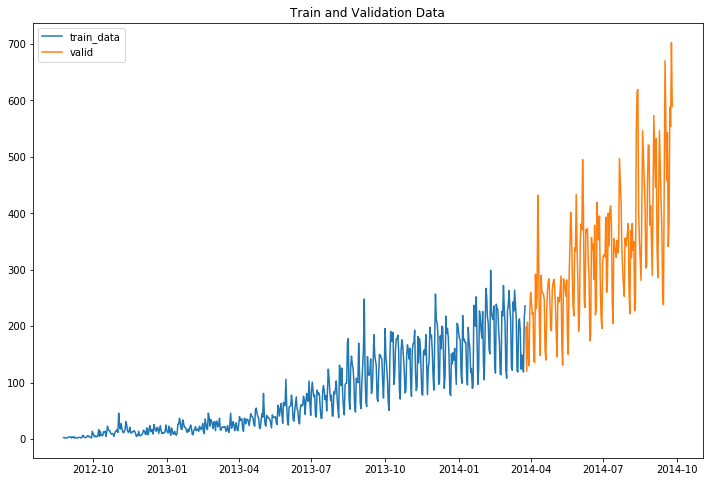

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

<img src = "alpha values.png">

In [ ]:
model = SimpleExpSmoothing(np.asarray(train_data['count']))
model = model.fit(smoothing_level=0.7,initial_level=3,optimized=False) 

valid_data['SES'] = model.forecast(len(valid_data)) 

In [ ]:
model.params

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [ ]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['SES']))
print('The RMSE value for Simple Exponential Smoothing Method is', rmse)

# Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(np.asarray(train_data['count']), trend='add')
model = model.fit(smoothing_level=0.7, smoothing_slope=0.0001, initial_slope = 1.2) #  

valid_data['Holt_linear'] = model.forecast(len(valid_data))

In [ ]:
model.params

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

In [ ]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)

# Holt's Winters (aka triple exponential smoothing)

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing

In [30]:
model = ExponentialSmoothing(np.asarray(train_data['count']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.1, smoothing_seasonal=0.8) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

In [31]:
model.params

{'smoothing_level': 0.4,
 'smoothing_slope': 0.1,
 'smoothing_seasonal': 0.8,
 'damping_slope': nan,
 'initial_level': 51.48192771084337,
 'initial_slope': 0.12244897959183675,
 'initial_seasons': array([0.05827288, 0.05827288, 0.03884858, 0.03884858, 0.03884858,
        0.05827288, 0.05827288]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

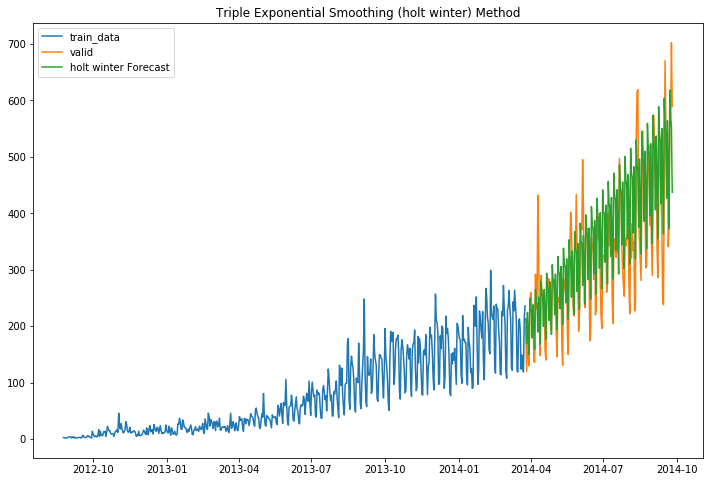

In [32]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [26]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 78.59684424893294
